# Shopify Data Science Challenge

by Samuel Abhishek Jebakumar

### 1) Importing Data and Dependancies

We start our analysis by importing the required dependacies after installing them into our virtual environment.

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import kaleido

In [11]:
raw_data = pd.read_excel('./data/2019 Winter Data Science Intern Challenge Data Set.xlsx')

### 2) Feature Engineering

#### Overview

The columns (features) seem fairly interpretable. Each row represents a transaction (single instance of shopping) by a user at a shop

In [12]:
prep_data = raw_data.copy()

display(raw_data.head())

prep_data.info()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   float64       
 1   shop_id         5000 non-null   float64       
 2   user_id         5000 non-null   float64       
 3   order_amount    5000 non-null   float64       
 4   total_items     5000 non-null   float64       
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 273.6+ KB


#### DataTypes

* Convert the ids to int datatype

* 'created_at' is imported correctly as datetime. Extract day and hour from 'created_at' datetime column.

In [13]:
# using the .dt accessor to split the date column

prep_data['order_id'] = prep_data['order_id'].astype(int)

prep_data['shop_id'] = prep_data['shop_id'].astype(int)

prep_data['user_id'] = prep_data['user_id'].astype(int)

prep_data['day'] = prep_data['created_at'].dt.day

prep_data['weekday_n'] = prep_data['created_at'].dt.weekday

daydict = {
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
}

prep_data['weekday'] = prep_data['weekday_n'].map(daydict)

prep_data['hour'] = prep_data['created_at'].dt.hour

#### Calculate Price of Sneaker

Since each store sells only one type of sneaker, we can calculate the price of that sneaker by divinding the order amount by the number of items in the cart

In [14]:
prep_data.insert(loc = 5, column = 'unit_amount', value = prep_data['order_amount'] / prep_data['total_items'])

#### Cleaned Data

This wraps up the basic feature engineering based on the information already provided to us. We will move on to exploring this data to understand trends and define performance metrics to quantify business performance.

In [15]:
prep_data.head()

,order_id,shop_id,user_id,order_amount,total_items,unit_amount,payment_method,created_at,day,weekday_n,weekday,hour
0,1,53,746,224.0,2.0,112.0,cash,2017-03-13 12:36:56.190,13,0,Monday,12
1,2,92,925,90.0,1.0,90.0,cash,2017-03-03 17:38:51.999,3,4,Friday,17
2,3,44,861,144.0,1.0,144.0,cash,2017-03-14 04:23:55.595,14,1,Tuesday,4
3,4,18,935,156.0,1.0,156.0,credit_card,2017-03-26 12:43:36.649,26,6,Sunday,12
4,5,18,883,156.0,1.0,156.0,credit_card,2017-03-01 04:35:10.773,1,2,Wednesday,4


### 3) Data Exploration

#### Overview

We start our exploration by understanding how many unique stores, customers and payment methods we see in our dataset

In [16]:
exp_data = prep_data.copy()

exp_data.nunique()

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
unit_amount         58
payment_method       3
created_at        4995
day                 30
weekday_n            7
weekday              7
hour                24
dtype: int64

There are 301 customers who contribute to 5000 transactions across 100 shops during the month of March 2017. 

Next we can try and visualize each order in the form of a scatter plot

#### Identifying Outliers

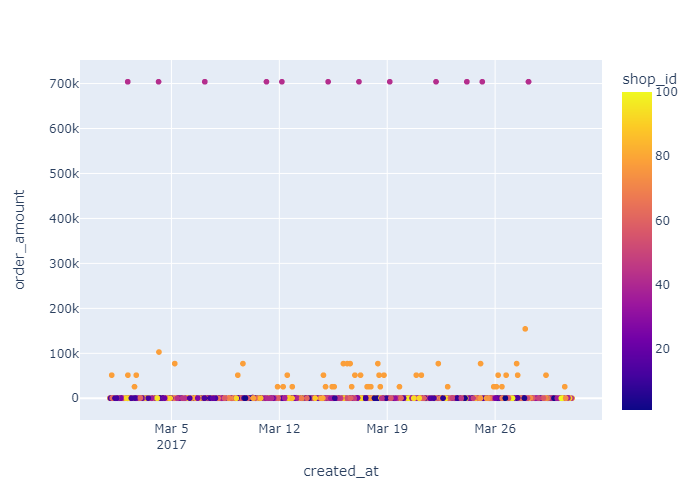

In [17]:
fig1 = px.scatter(exp_data, x = 'created_at', y = 'order_amount', color = 'shop_id')
fig1.show('png')

There are several high-value outliers in the dataset. All observed high-value orders of $704,000 have taken place in shop 42.

Shop 78 too has recorded a number of high-value orders throughout the month of March

Let us further investigate these two stores as they will have a considerable impact on how performance metrics are to be defined

#### Exploring High-Value Shops 

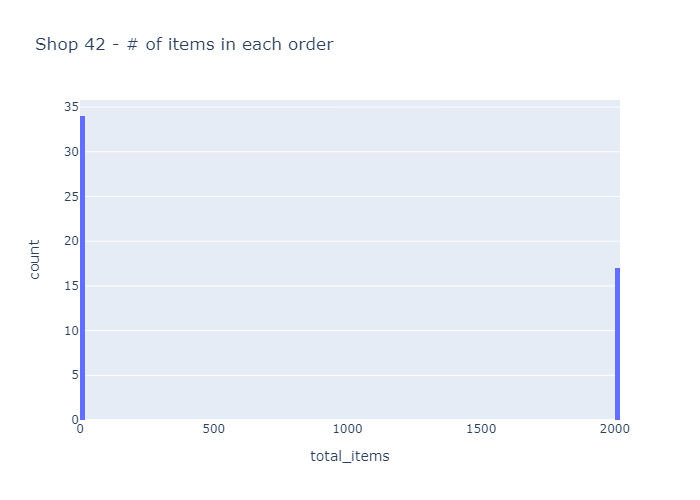

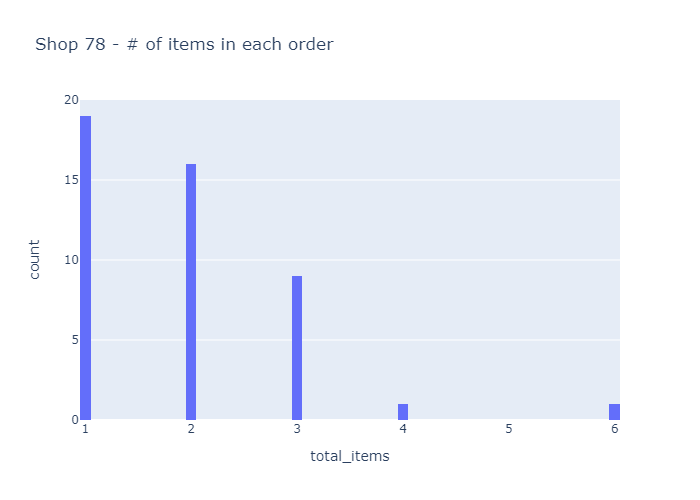

In [18]:
store42 = exp_data.query('shop_id == 42')

store78 = exp_data.query('shop_id == 78')

fig42 = px.histogram(store42, x = 'total_items', nbins=100, title='Shop 42 - # of items in each order')

fig42.show('png')

fig78 = px.histogram(store78, x = 'total_items', nbins=100,  title='Shop 78 - # of items in each order')

fig78.show('png')

In [19]:
store42.append(store78).groupby('shop_id', as_index = False).mean()[['shop_id', 'unit_amount']]

,shop_id,unit_amount
0,42,352.0
1,78,25725.0


#### Exploring Regular Shops

We can analyze all other stores to get a sense of the typical trends

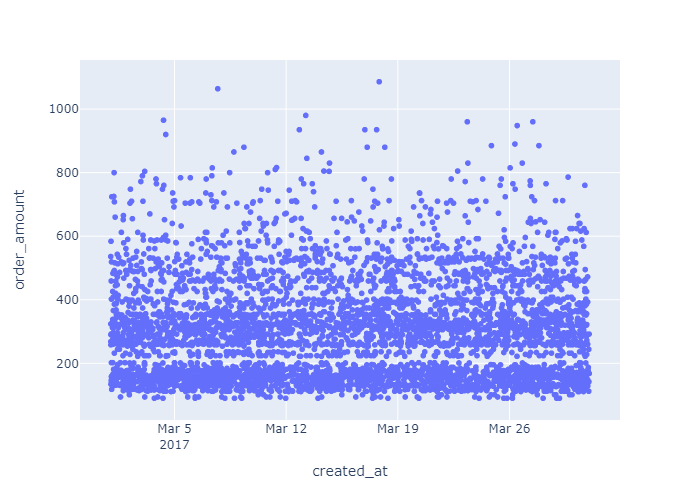

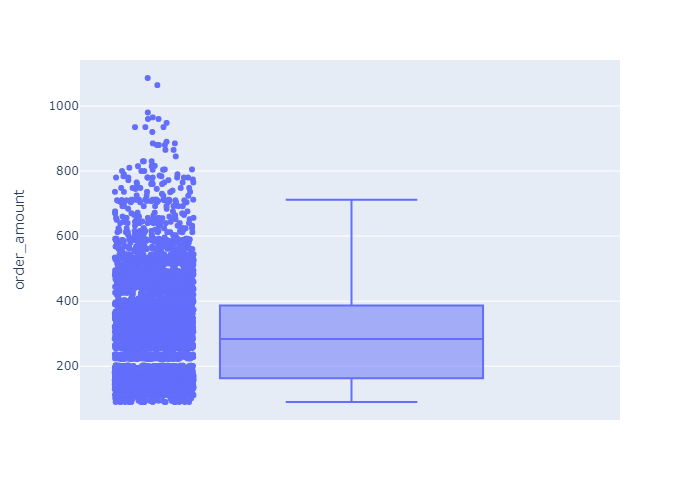

In [20]:
norm_data = exp_data.query("shop_id != 42 and shop_id != 78")

fig2 = px.scatter(norm_data, x = 'created_at', y ='order_amount')
fig2.show('png')

fig3 = px.box(norm_data, y = 'order_amount', points='all')
fig3.show('png')

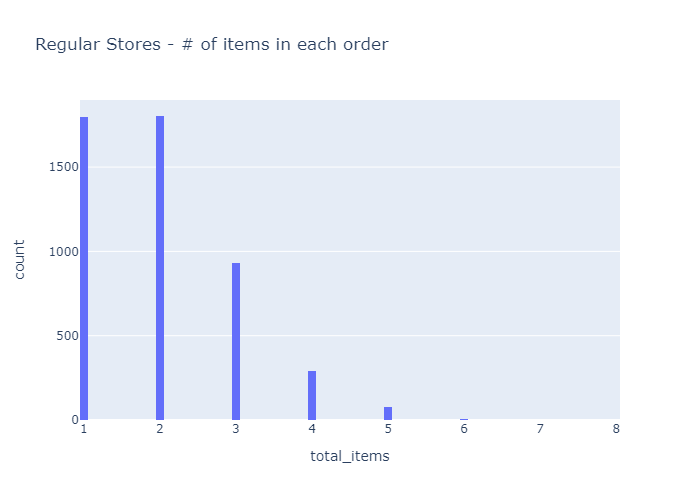

In [21]:
fignorm = px.histogram(norm_data, x = 'total_items', nbins=100,  title='Regular Stores - # of items in each order')
fignorm.show('png')

In [22]:
norm_data.groupby('shop_id', as_index = False).mean()[['shop_id', 'unit_amount']].describe()[['unit_amount']]

,unit_amount
count,98.00000
mean,150.22449
std,23.91675
min,90.00000
25%,132.25000
50%,153.00000
75%,165.75000
max,201.00000


#### Summary of Exploratory Findings

* The data contains outlier transactions from stores 42 and 78
* Store 42: 
    * Sneakers priced at $352
    * Over 2000 units of sneakers sold in a single order in some cases
* Store 78:
    * Sneakers priced at $25,725
    * upto 6 sneakers sold in a single order
* Regular Stores:
    * Sneakers priced between $90 and $201
    * 91% of orders sold at most 3 sneakers

### 4) Defining Business Performance Metrics or KPIs

#### Pitfalls of using Average Order Value (AOV)

The key finding from the exporatory analysis was that the data contained outlier transactions from stores 42 and 78. These outliers could potentially over-estimate our Average Order Values (AOV) and skew our analysis.

Let's have a look at how the naive AOV analysis looks like when we don't remove the outliers

The Naive Average Order Value (AOV) is $3145.128


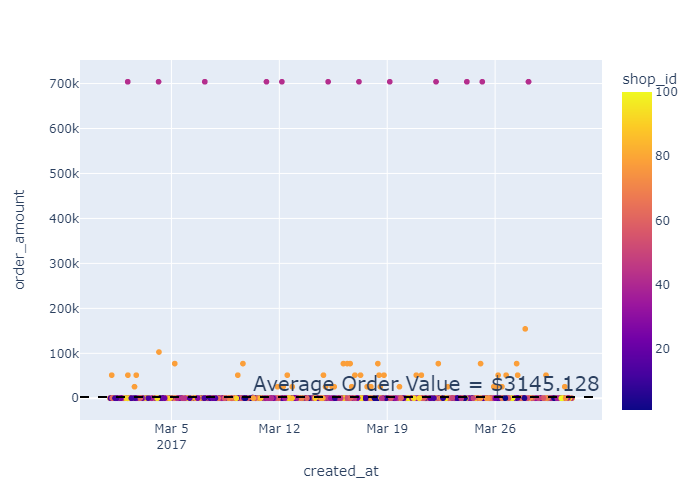

In [23]:
full_aov = exp_data['order_amount'].mean()

print(f'The Naive Average Order Value (AOV) is ${round(full_aov,3)}')

fig4 = px.scatter(exp_data, x = 'created_at', y ='order_amount', color= 'shop_id')
fig4.add_hline(y=full_aov, line_width=2, line_dash="dash", line_color="black", annotation_text = f'Average Order Value = ${round(full_aov,3)}', annotation=dict(font_size=20))
fig4.show('png')

#### Median Order Value (MOV)

The Average Order Value is $3145.128!! It's obvious that the AOV is over-exaggerated because of stores 42 and 78. 

An approach to get better estimates of central tendancy is by using the Median or Mode. These estimates do not get influenced by extreme outliers.

In the (extremely compressed) boxplot below we can see that the Median Order Value is $284.

<i>Hover over the visual to view quartiles</i>

The Median Order Value (MOV) is $284.0


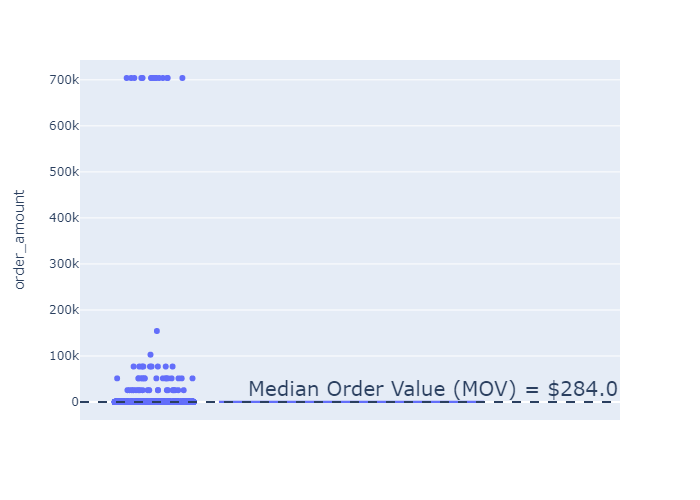

In [24]:
full_mov = exp_data['order_amount'].median()

print(f'The Median Order Value (MOV) is ${round(full_mov,3)}')

fig5 = px.box(exp_data, y ='order_amount', points= 'all')
fig5.add_hline(y=full_mov, line_dash="dash", annotation_text= f'Median Order Value (MOV) = ${full_mov}', annotation_position="top right", annotation=dict(font_size=20))
fig5.show('png')

#### Piece-wise (AOV/MOV) Analysis

Alternatively, we can analyze the regular shops and the high order value shops separately to avoid distortion and make better business decisions.

##### Regular Stores

The Average Order Value (AOV) for regular stores is $300.156
The Median Order Value (MOV) for regular stores is $284.0


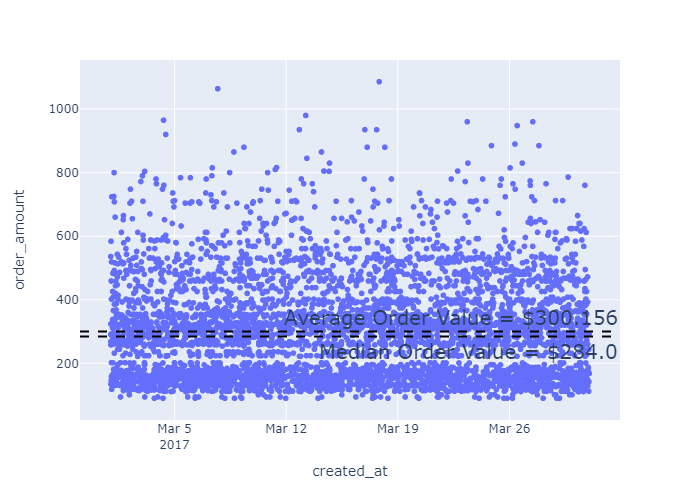

In [25]:
norm_aov = norm_data['order_amount'].mean()
norm_mov = norm_data['order_amount'].median()

print(f'The Average Order Value (AOV) for regular stores is ${round(norm_aov,3)}')
print(f'The Median Order Value (MOV) for regular stores is ${round(norm_mov,3)}')

fig6 = px.scatter(norm_data, x = 'created_at', y ='order_amount')
fig6.add_hline(y=norm_aov, line_width=2, line_dash="dash", line_color="black", annotation_text = f'Average Order Value = ${round(norm_aov,3)}', annotation_position="top right", annotation=dict(font_size=20))
fig6.add_hline(y=norm_mov, line_width=2, line_dash="dash", line_color="black", annotation_text = f'Median Order Value = ${round(norm_mov,3)}', annotation_position="bottom right", annotation=dict(font_size=20))
fig6.show('png')

##### Store 42

The Average Order Value (AOV) for store 42 is $235101.49
The Median Order Value (MOV) for store 42 is $704.0


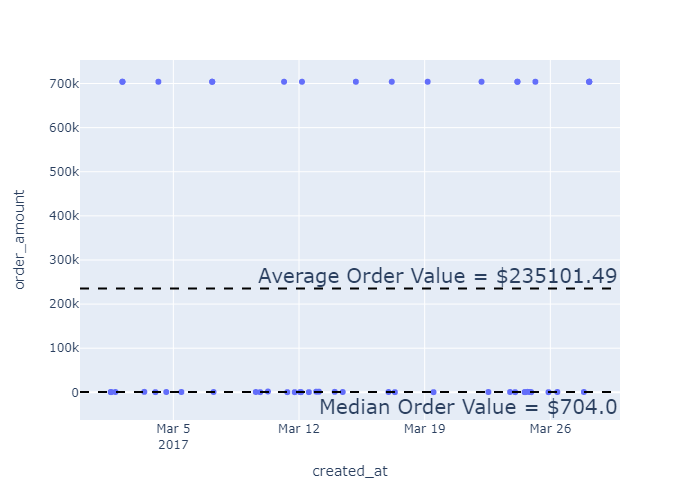

In [26]:
aov_42 = store42['order_amount'].mean()
mov_42 = store42['order_amount'].median()

print(f'The Average Order Value (AOV) for store 42 is ${round(aov_42,3)}')
print(f'The Median Order Value (MOV) for store 42 is ${round(mov_42,3)}')

fig7 = px.scatter(store42, x = 'created_at', y ='order_amount')
fig7.add_hline(y=aov_42, line_width=2, line_dash="dash", line_color="black", annotation_text = f'Average Order Value = ${round(aov_42,3)}', annotation_position='top right', annotation=dict(font_size=20))
fig7.add_hline(y=mov_42, line_width=2, line_dash="dash", line_color="black", annotation_text = f'Median Order Value = ${round(mov_42,3)}', annotation_position='bottom right', annotation=dict(font_size=20))
fig7.show('png')

##### Store 78

The Average Order Value (AOV) for store 78 is $49213.043
The Median Order Value (MOV) for store 78 is $51450.0


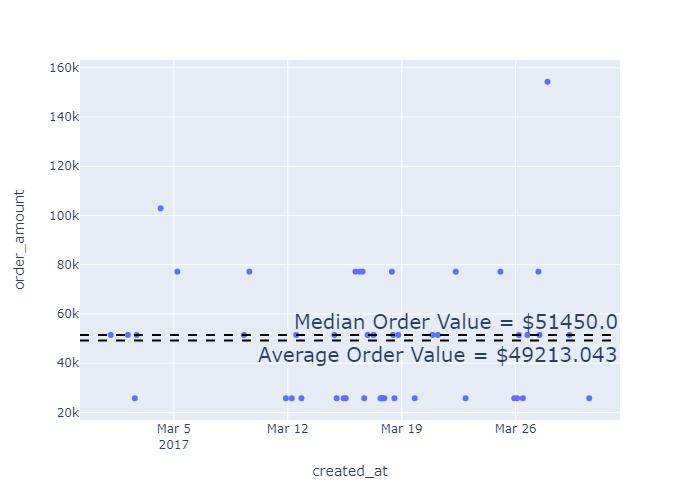

In [27]:
aov_78 = store78['order_amount'].mean()
mov_78 = store78['order_amount'].median()

print(f'The Average Order Value (AOV) for store 78 is ${round(aov_78,3)}')
print(f'The Median Order Value (MOV) for store 78 is ${round(mov_78,3)}')

fig8 = px.scatter(store78, x = 'created_at', y ='order_amount')
fig8.add_hline(y=aov_78, line_width=2, line_dash="dash", line_color="black", annotation_text = f'Average Order Value = ${round(aov_78,3)}', annotation_position='bottom right', annotation=dict(font_size=20))
fig8.add_hline(y=mov_78, line_width=2, line_dash="dash", line_color="black", annotation_text = f'Median Order Value = ${round(mov_78,3)}', annotation_position='top right', annotation=dict(font_size=20))
fig8.show('png') 

### Additional Insights

Analyzing Median Order Value (MOV) for each day of the week

Which days of the week record the most shopping activity?

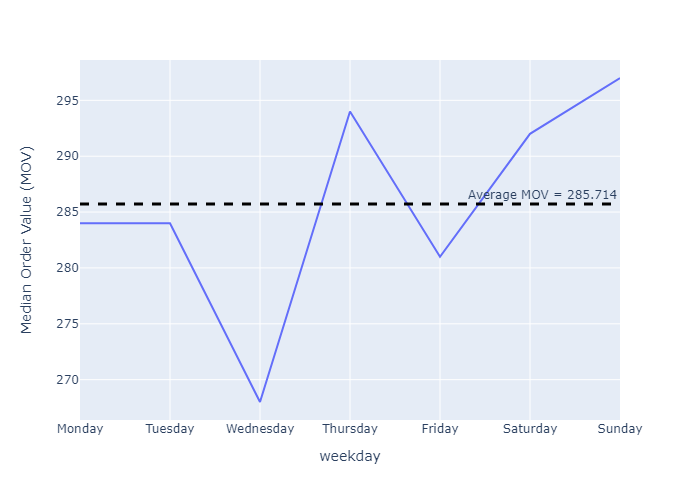

In [28]:
dayavg = exp_data.groupby('weekday', as_index= False).median()['order_amount'].mean()

fig9 = px.line(exp_data.groupby(['weekday_n', 'weekday'], as_index= False).median()[['weekday', 'order_amount']], x = 'weekday', y = 'order_amount', labels={'order_amount':'Median Order Value (MOV)'})
fig9.add_hline(y=dayavg, line_width=3, line_dash="dash", line_color="black", annotation_text = f'Average MOV = {round(dayavg,3)}')
fig9.show('png')

What are the peak hours of shopping during the day?

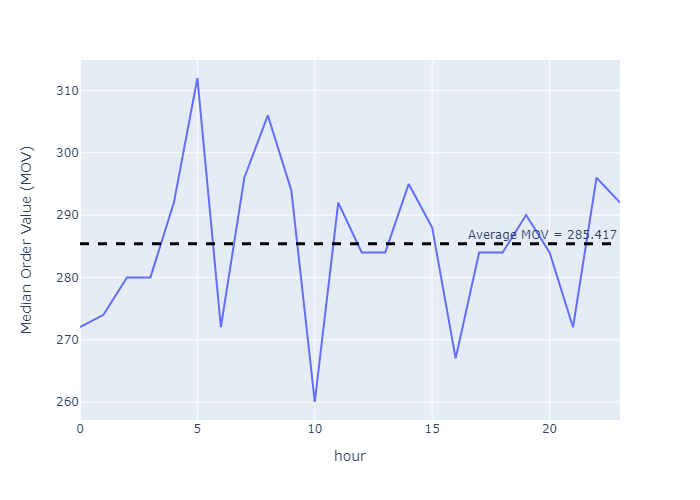

In [29]:
hravg = exp_data.groupby('hour', as_index= False).median()['order_amount'].mean()

fig10 = px.line(exp_data.groupby('hour', as_index= False).median()[['hour', 'order_amount']], x = 'hour', y ='order_amount', labels={'order_amount':'Median Order Value (MOV)'})
fig10.add_hline(y=hravg, line_width=3, line_dash="dash", line_color="black", annotation_text = f'Average MOV = {round(hravg,3)}')
fig10.show('png')

#### Summary of Additional Insights

* Peak shopping days are Thursday, Saturday and Sunday
* Peak shopping hours are (4am - 9am), 2pm and 11pm

Promotional campaigns and deals could be designed based on peak shopping days and hours.